In [1]:
# Import required packages
import sys
# !{sys.executable} -m pip install seaborn
from glob import glob
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from shutil import copy,move
from distutils.dir_util import copy_tree


In [6]:
quantum_linear=pd.read_csv('function-calc-test/best_learning_curves/linear/results.csv').melt(id_vars=['ratio'])
quantum_quadratic=pd.read_csv('function-calc-test/best_learning_curves/quadratic/results.csv').melt(id_vars=['ratio'])
quantum_sine=pd.read_csv('function-calc-test/best_learning_curves/sine/results.csv').melt(id_vars=['ratio'])

In [10]:
function=['linear','quadratic','sine']
trainsize=[ 0.1,0.3, 0.5, 0.7,0.8]
classical_models=['ridge', 'lasso', 'elastic', 'knn', 'rfr', 'grad', 'svr', 'krr', 'gpr'
]

In [16]:
classical_results={}
for fn in function:
    classical_results[fn]={}
    for models in classical_models:
        classical_results[fn][models]={}
        for ts in trainsize:
            with open(f"classical_testing/{fn}/{ts}_{models}_scores.json",'r') as f:
                classical_results[fn][models][ts]=json.load(f)
            

In [29]:
avgs=pd.DataFrame.from_dict({k:{k1:pd.DataFrame.from_dict(v1).loc[['R2_train','R2_test']].mean().mean() for k1,v1 in v.items()} for k,v in classical_results.items()    })

In [33]:
avgs.T.mean().sort_values()

elastic    0.137520
lasso      0.152571
ridge      0.171749
grad       0.869228
rfr        0.878325
krr        0.881074
knn        0.883888
gpr        0.895503
svr        0.916105
dtype: float64

In [46]:
palette=sns.color_palette('Paired',4)

In [48]:
classical_linear=pd.DataFrame.from_dict(classical_results['linear']['svr']).loc[['R2_train','R2_test']].T.reset_index().rename(columns={'index':'ratio'}).melt(id_vars=['ratio'])
classical_quadratic=pd.DataFrame.from_dict(classical_results['quadratic']['svr']).loc[['R2_train','R2_test']].T.reset_index().rename(columns={'index':'ratio'}).melt(id_vars=['ratio'])
classical_sine=pd.DataFrame.from_dict(classical_results['sine']['svr']).loc[['R2_train','R2_test']].T.reset_index().rename(columns={'index':'ratio'}).melt(id_vars=['ratio'])

In [55]:
palette[2:]

[(0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313)]

<Axes: xlabel='ratio', ylabel='value'>

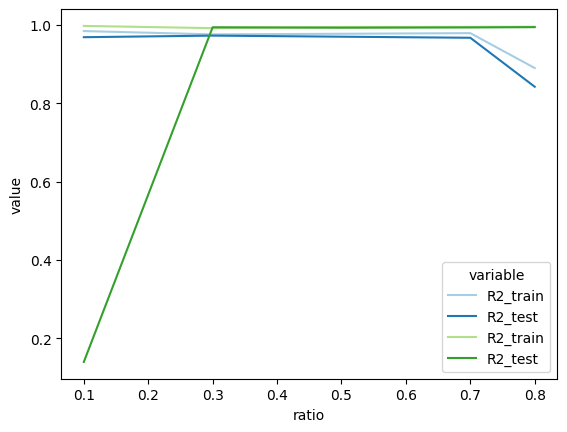

In [56]:
sns.lineplot(data=quantum_linear,x='ratio',y='value',hue='variable',palette=palette[0:2])
sns.lineplot(data=classical_linear,x='ratio',y='value',hue='variable',palette=palette[2:])

<Axes: xlabel='ratio', ylabel='value'>

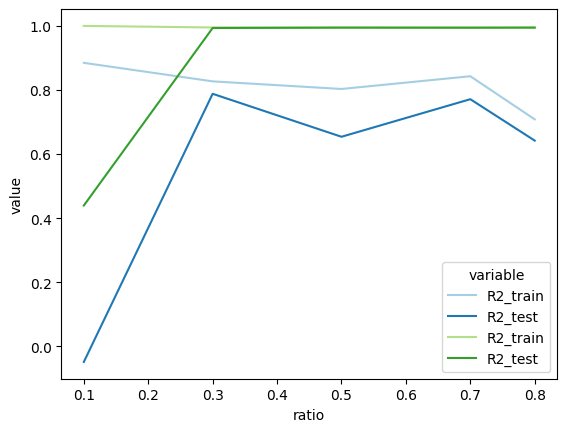

In [57]:
sns.lineplot(data=quantum_quadratic,x='ratio',y='value',hue='variable',palette=palette[0:2])
sns.lineplot(data=classical_quadratic,x='ratio',y='value',hue='variable',palette=palette[2:])

<Axes: xlabel='ratio', ylabel='value'>

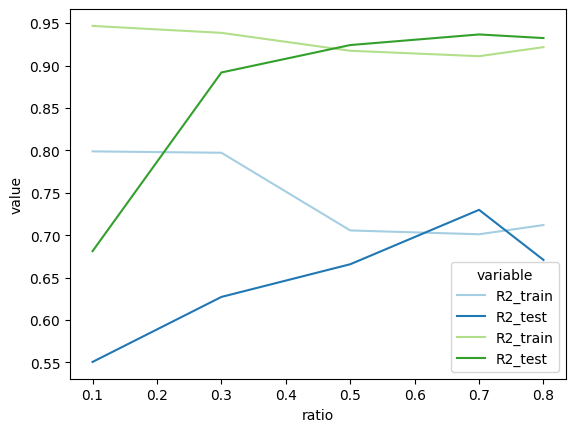

In [58]:
sns.lineplot(data=quantum_sine,x='ratio',y='value',hue='variable',palette=palette[0:2])
sns.lineplot(data=classical_sine,x='ratio',y='value',hue='variable',palette=palette[2:])